# Cartoon Image - OpenCV
#### author : aahmadnjad

In [1]:
import os
import cv2
import glob
import matplotlib.pyplot as plt

## define our variables:
- INPUT_FOLDER is in our directory for our orginal images
- if your images is other formats like png change the FILES_FORMAT 
- j used for saving our images in 'cartoonImage' folder
- cols and rows used for plot

In [2]:
INPUT_FOLDER = 'images'
FILES_FORMAT = 'jpg'
j=1
cols=2
rows= len(os.listdir('./images'))
if rows > 5:
    rows= 5    

### images Array is for saving orginal and cartoon images for plot later

In [3]:
images=[]

### this part is the proccess part:
- first we need create a mask. some lines for image to make it like a drawing
- then we blur our image to make it more fantasy
- finally we use our mask (first step) and deploy it on our fantasy image

In [4]:
for img in glob.glob(INPUT_FOLDER + '/*.{}'.format(FILES_FORMAT)):
    image = cv2.imread(img)
    
    ### create mask ###
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    smoothGrayScale = cv2.medianBlur(gray, 5) 
        #for more lines in final image (more highlight edges) you can set the medianBlure to 3 or 1
    highlightEdges = cv2.adaptiveThreshold(smoothGrayScale, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 9, 9)
    
    ### fantasy image ###
    preCartoonImage = cv2.bilateralFilter(image, 9, 300, 300)
    
    ### deploy our mask on our fantasy image ###
    cartoonImage = cv2.bitwise_and(preCartoonImage, preCartoonImage, mask=highlightEdges)
    
    ### append orginal and cartoon image in array for plotting ###
    images.append(cv2.resize(image[:,:,::-1] ,dsize = (200,200)))
    images.append(cv2.resize(cartoonImage[:,:,::-1] ,dsize = (200,200)))
    
    ### save cartoon image in cartoonImgs Folder ###
    cv2.imwrite(os.path.join('./cartoonImgs','{}.jpeg'.format(j)), cartoonImage)
    j+=1

### plot our orginal and cartoon image together using matplotlib

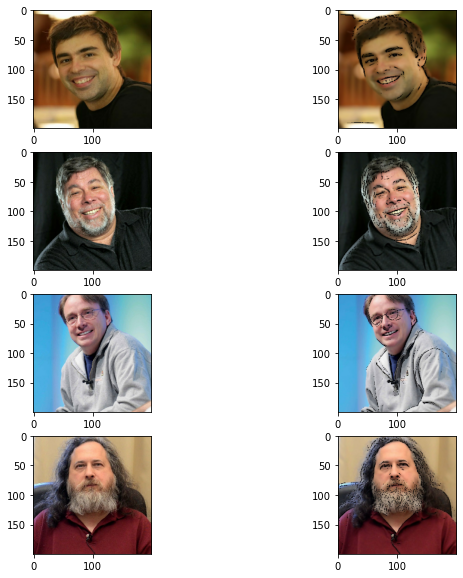

In [5]:
fig=plt.figure(figsize=(10, 10))
for i in range (1,cols*rows+1):
    fig.add_subplot(rows,cols,i)
    plt.imshow(images[i-1],cmap='gray');
    
plt.show()